In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from cpymad.madx import Madx
from matplotlib import cm, gridspec, patches
import os

import xobjects as xo
import xline as xl
import xtrack as xt

import elettra_toolbox

In [2]:
if os.path.exists("stdout.out"):
    os.remove("stdout.out")

# Launch MAD-X Session
with open('stdout.out', 'w') as f:
    madx = Madx(stdout=f)


# Read parameters

from config import parameters
from config import settings

for i in parameters.keys():
    madx.globals[i] = parameters[i]


# Call sequence and optics 

madx.call('elettra2_v15_VADER_2.3T.madx');
madx.call('optics_elettra2_v15_VADER_2.3T.madx');

# Set opt AB

k_ab_opt = 5.191616161616161
# Optimal value for the antibeands
madx.globals.k1_bqf1 = k_ab_opt
madx.globals.k1_bqf2 = k_ab_opt
madx.globals.k1_bqf3 = k_ab_opt
madx.globals.k1_bqf4 = k_ab_opt

# Initial twiss

madx.use(sequence='ring')
madx.twiss(sequence='ring', table='init_twiss');

# Compute Emittance 

madx.input(f'''
emit, deltap={madx.globals.deltap};
emit, deltap={madx.globals.deltap};
''')

# Stop MAD-X instance

#madx.quit()

# Get the emittance from the standard output

ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)


print(f'Emittance x : {ex*1e12} pm')

Emittance x : 164.33805 pm


In [3]:
from pyhdtoolkit import cpymadtools
plt.rcParams.update({"text.usetex": False})

In [4]:
twiss = madx.table.init_twiss.dframe()

2021-10-05 10:13:16.564 | INFO     | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:638 - Plotting optics functions and machine layout
2021-10-05 10:13:16.566 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:639 - Getting Twiss dataframe from cpymad
2021-10-05 10:13:17.415 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_make_elements_groups:1319 - Getting different element groups dframes from MAD-X twiss table
2021-10-05 10:13:17.545 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_plot_machine_layout:1191 - Plotting machine layout
2021-10-05 10:13:18.820 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:665 - Plotting beta functions
2021-10-05 10:13:18.846 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:673 - Plotting dispersion functions
2021-10-05 10:13:18.878 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:691 - Setting xlim for longitudinal coordinate


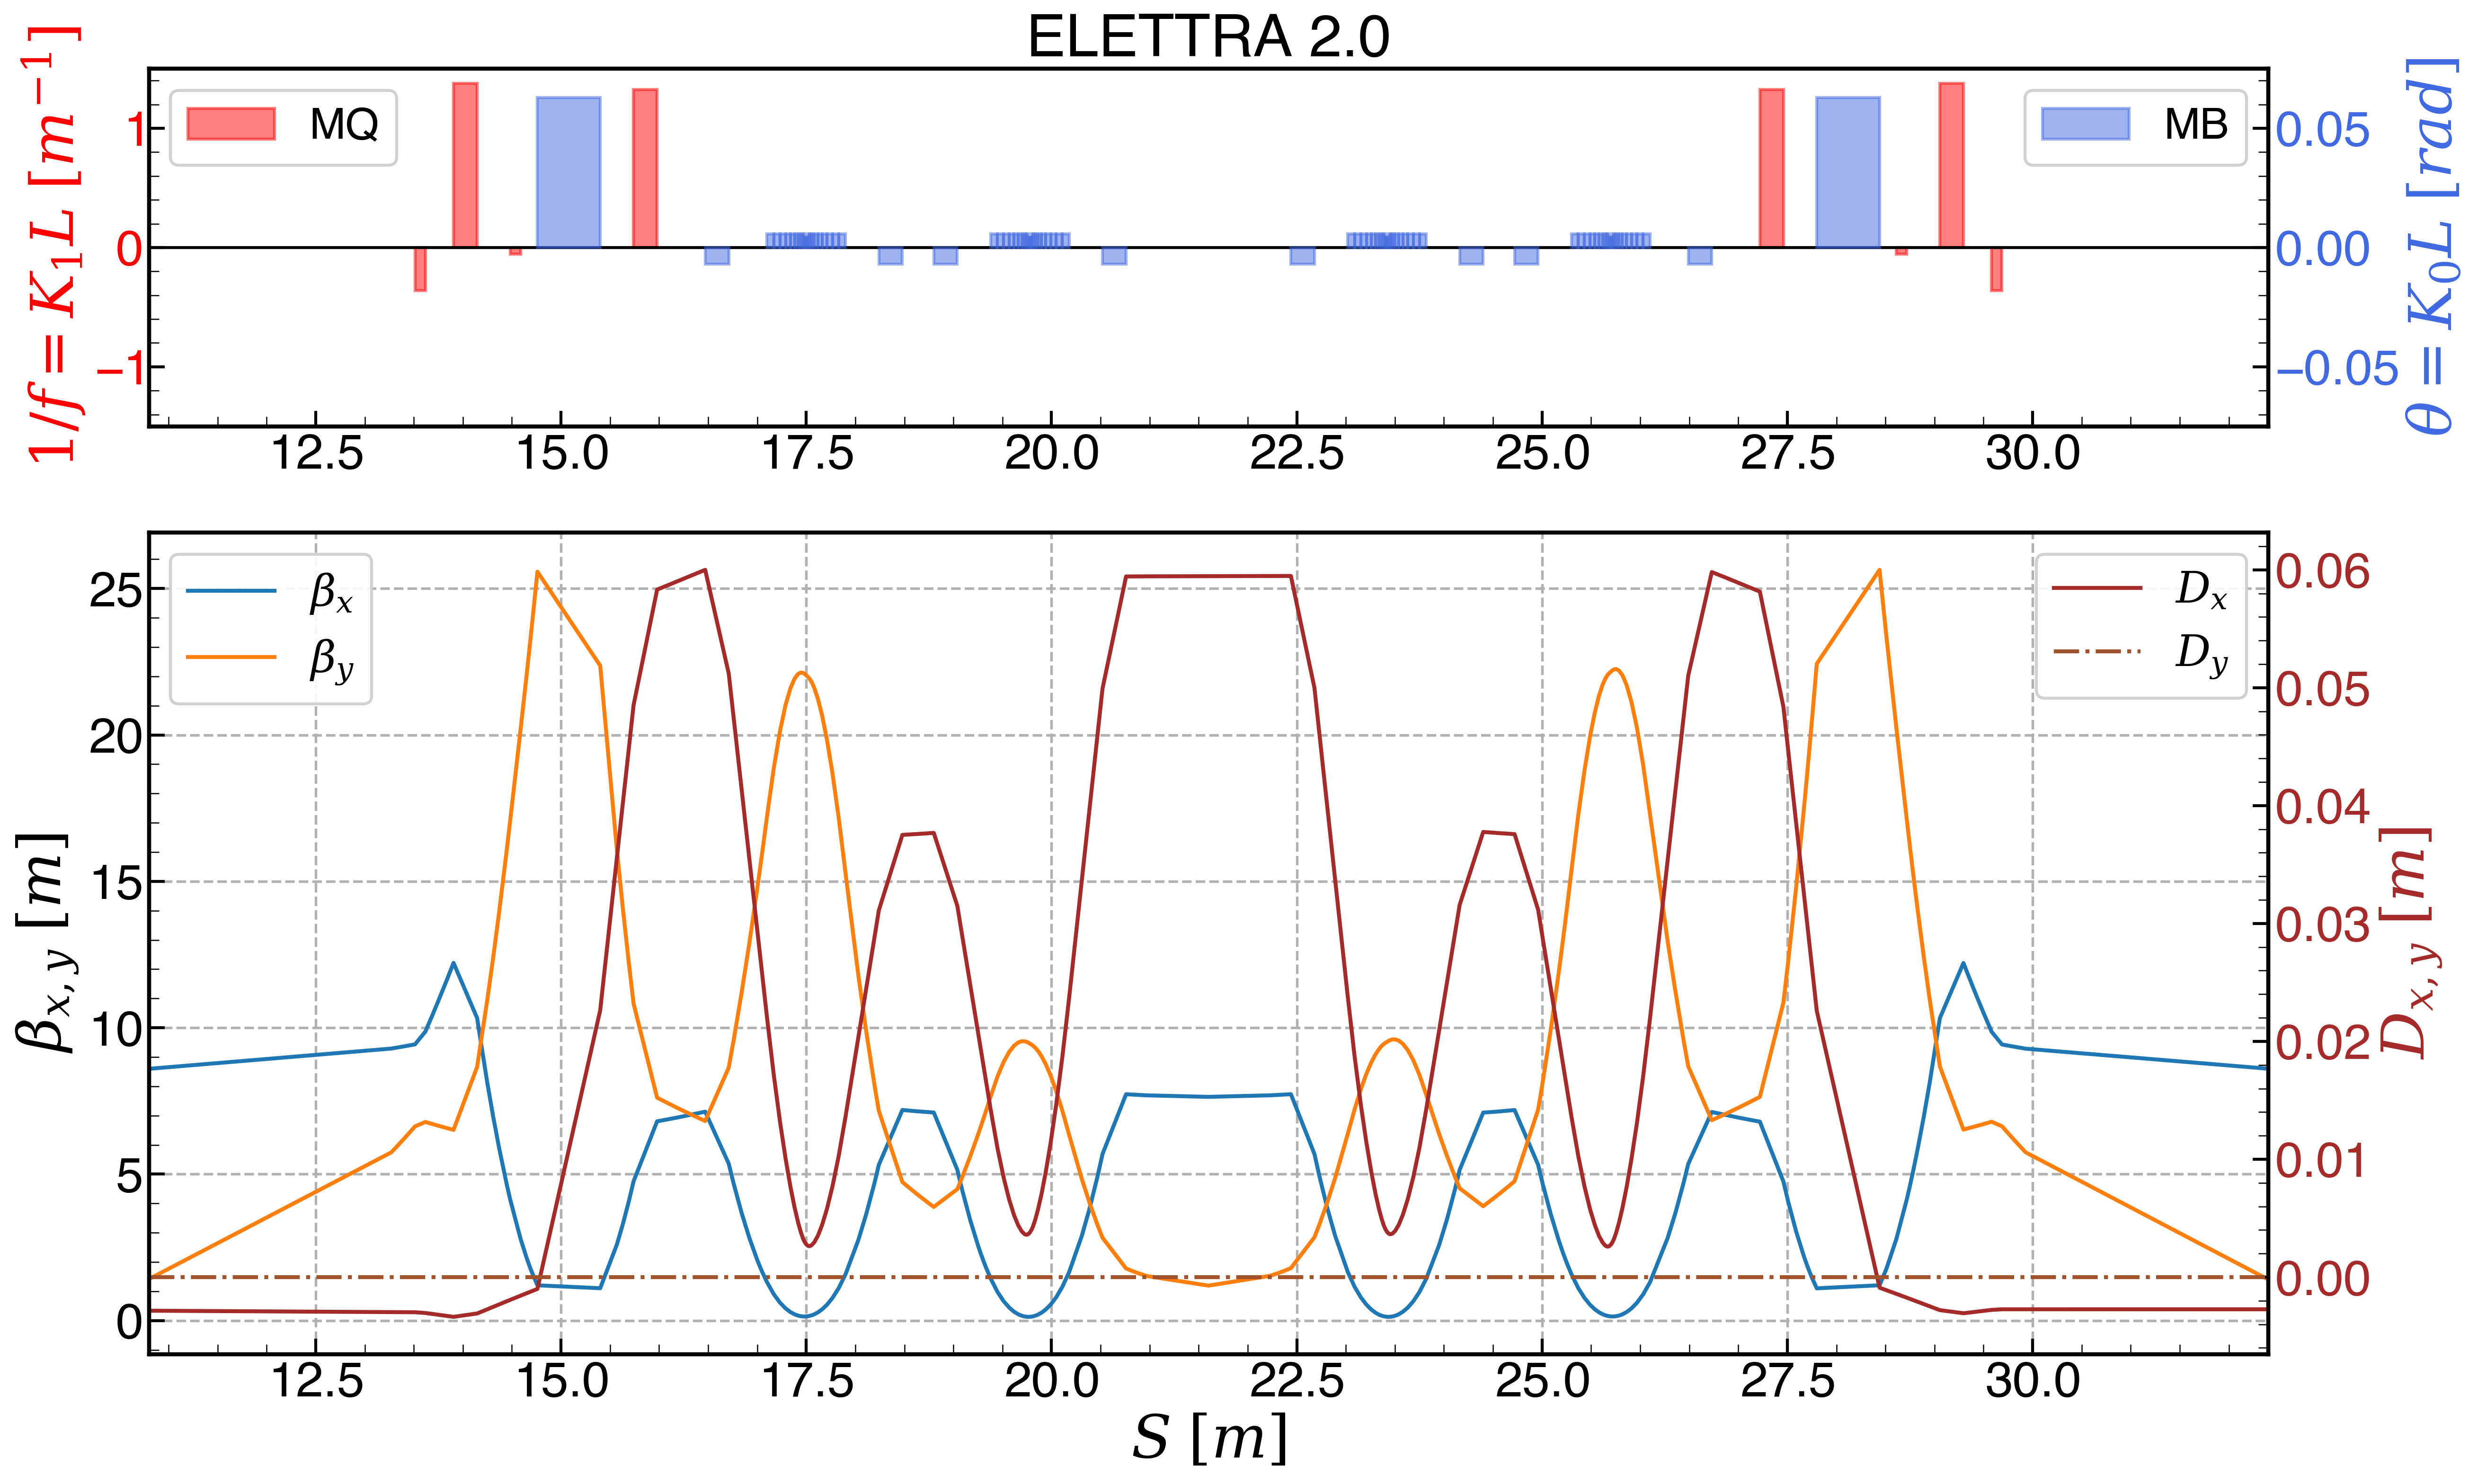

In [5]:
s_start = twiss[twiss.name=='ll:1']['s'][0]
s_end = twiss[twiss.name=='ll:3']['s'][0]

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(madx=madx, title='ELETTRA 2.0', 
                                                               xlimits=(s_start,s_end), disp_ylim=None, 
                                                               k0l_lim=(-75*1e-3,75*1e-3), k1l_lim=(-1.5,1.5))

2021-10-05 10:13:23.540 | INFO     | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:638 - Plotting optics functions and machine layout
2021-10-05 10:13:23.541 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:639 - Getting Twiss dataframe from cpymad
2021-10-05 10:13:24.277 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_make_elements_groups:1319 - Getting different element groups dframes from MAD-X twiss table
2021-10-05 10:13:24.382 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_plot_machine_layout:1191 - Plotting machine layout
2021-10-05 10:13:25.609 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:665 - Plotting beta functions
2021-10-05 10:13:25.633 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:673 - Plotting dispersion functions
2021-10-05 10:13:25.668 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:687 - Setting ylim for dispersion plot
2021-10-05 10:13:25.669 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:691 - Setting xlim 

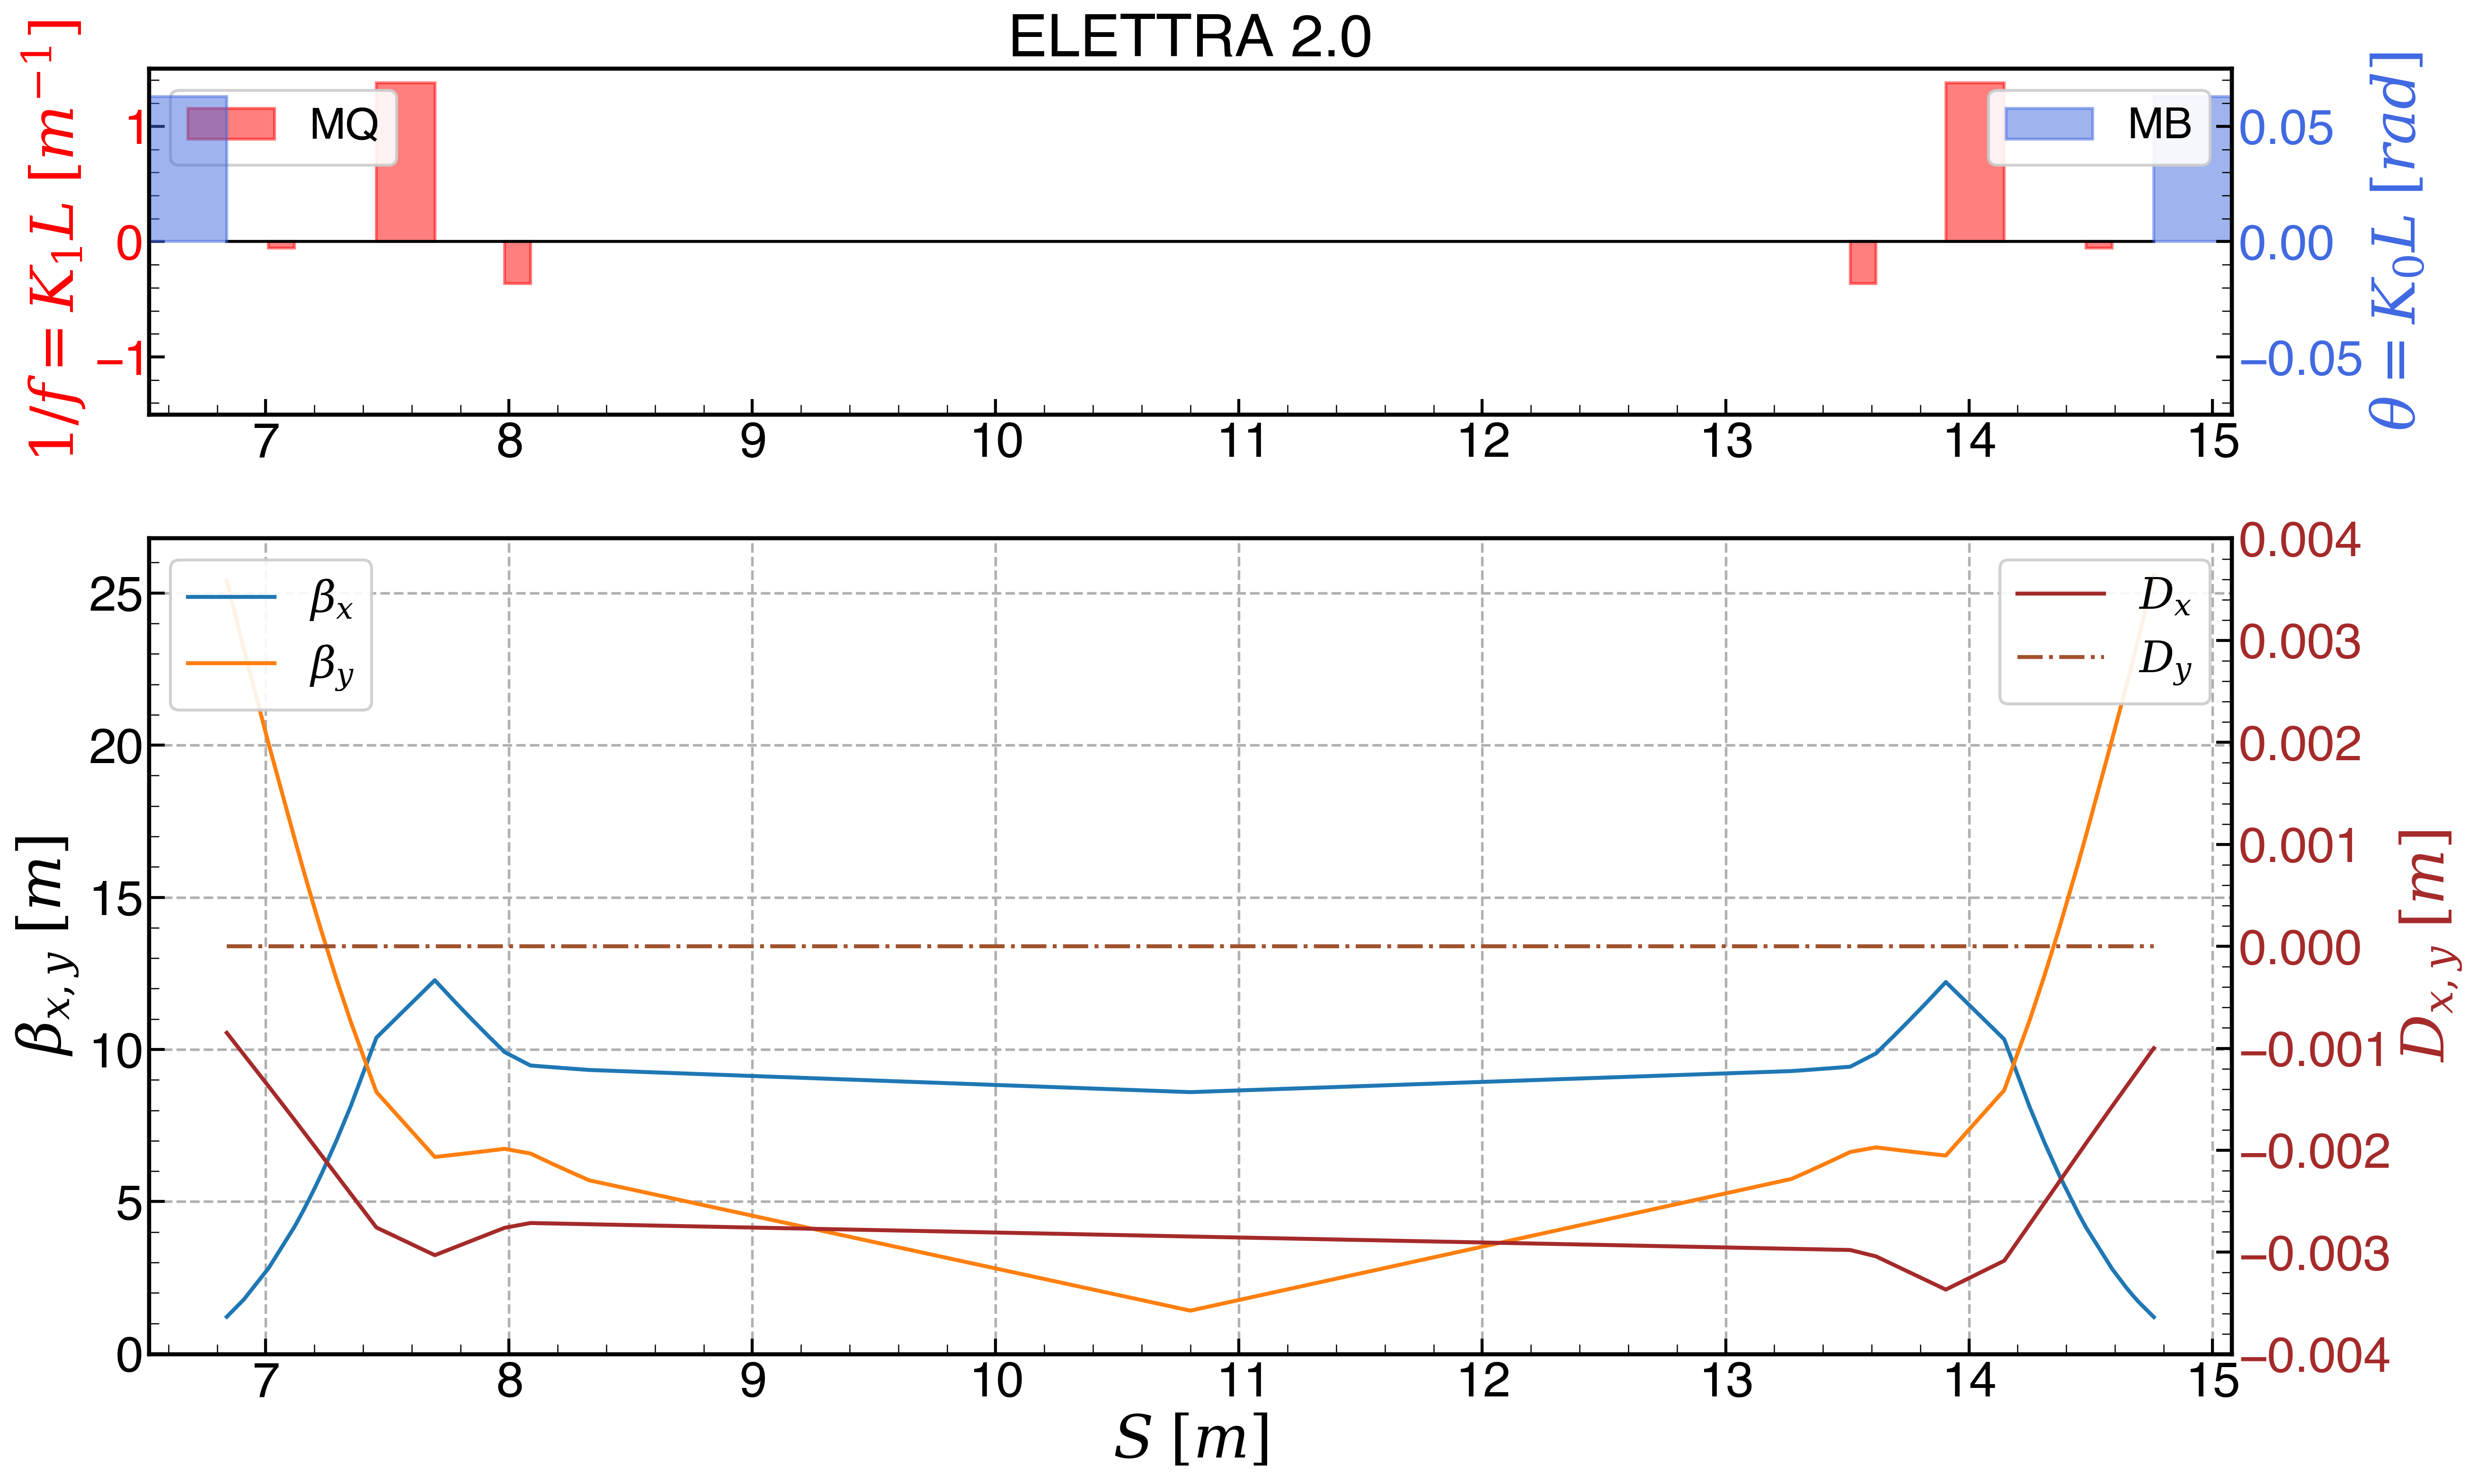

In [6]:
s_start = twiss[twiss.name=='bf1:1']['s'][0] - twiss[twiss.name=='bf1:1']['l'][0]/2
s_end = twiss[twiss.name=='bf1:2']['s'][0] - twiss[twiss.name=='bf1:2']['l'][0]/2

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(madx=madx, title='ELETTRA 2.0', 
                                                               xlimits=(s_start,s_end), disp_ylim=(-0.004, 0.004), 
                                                               k0l_lim=(-75*1e-3,75*1e-3), k1l_lim=(-1.5,1.5))

In [12]:
madx.input('''

!match, range=ll[1]/ll[3], dx=0, dy=0;
match, sequence=ring;
vary, name=k1_qd1, step=1e-6;
vary, name=k1_qf1, step=1e-6;
vary, name=k1_qd2, step=1e-6;
vary, name=k1_qf2, step=1e-6;
constraint, range=ll[1], dx=0, dy=0;
constraint, range=ll[3], dx=0, dy=0;
lmdif, calls=1000, tolerance=1e-21;
endmatch;


''')

True

2021-10-05 10:15:27.387 | INFO     | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:638 - Plotting optics functions and machine layout
2021-10-05 10:15:27.389 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:639 - Getting Twiss dataframe from cpymad
2021-10-05 10:15:28.135 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_make_elements_groups:1319 - Getting different element groups dframes from MAD-X twiss table
2021-10-05 10:15:28.423 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_plot_machine_layout:1191 - Plotting machine layout
2021-10-05 10:15:29.538 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:665 - Plotting beta functions
2021-10-05 10:15:29.568 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:673 - Plotting dispersion functions
2021-10-05 10:15:29.605 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:691 - Setting xlim for longitudinal coordinate


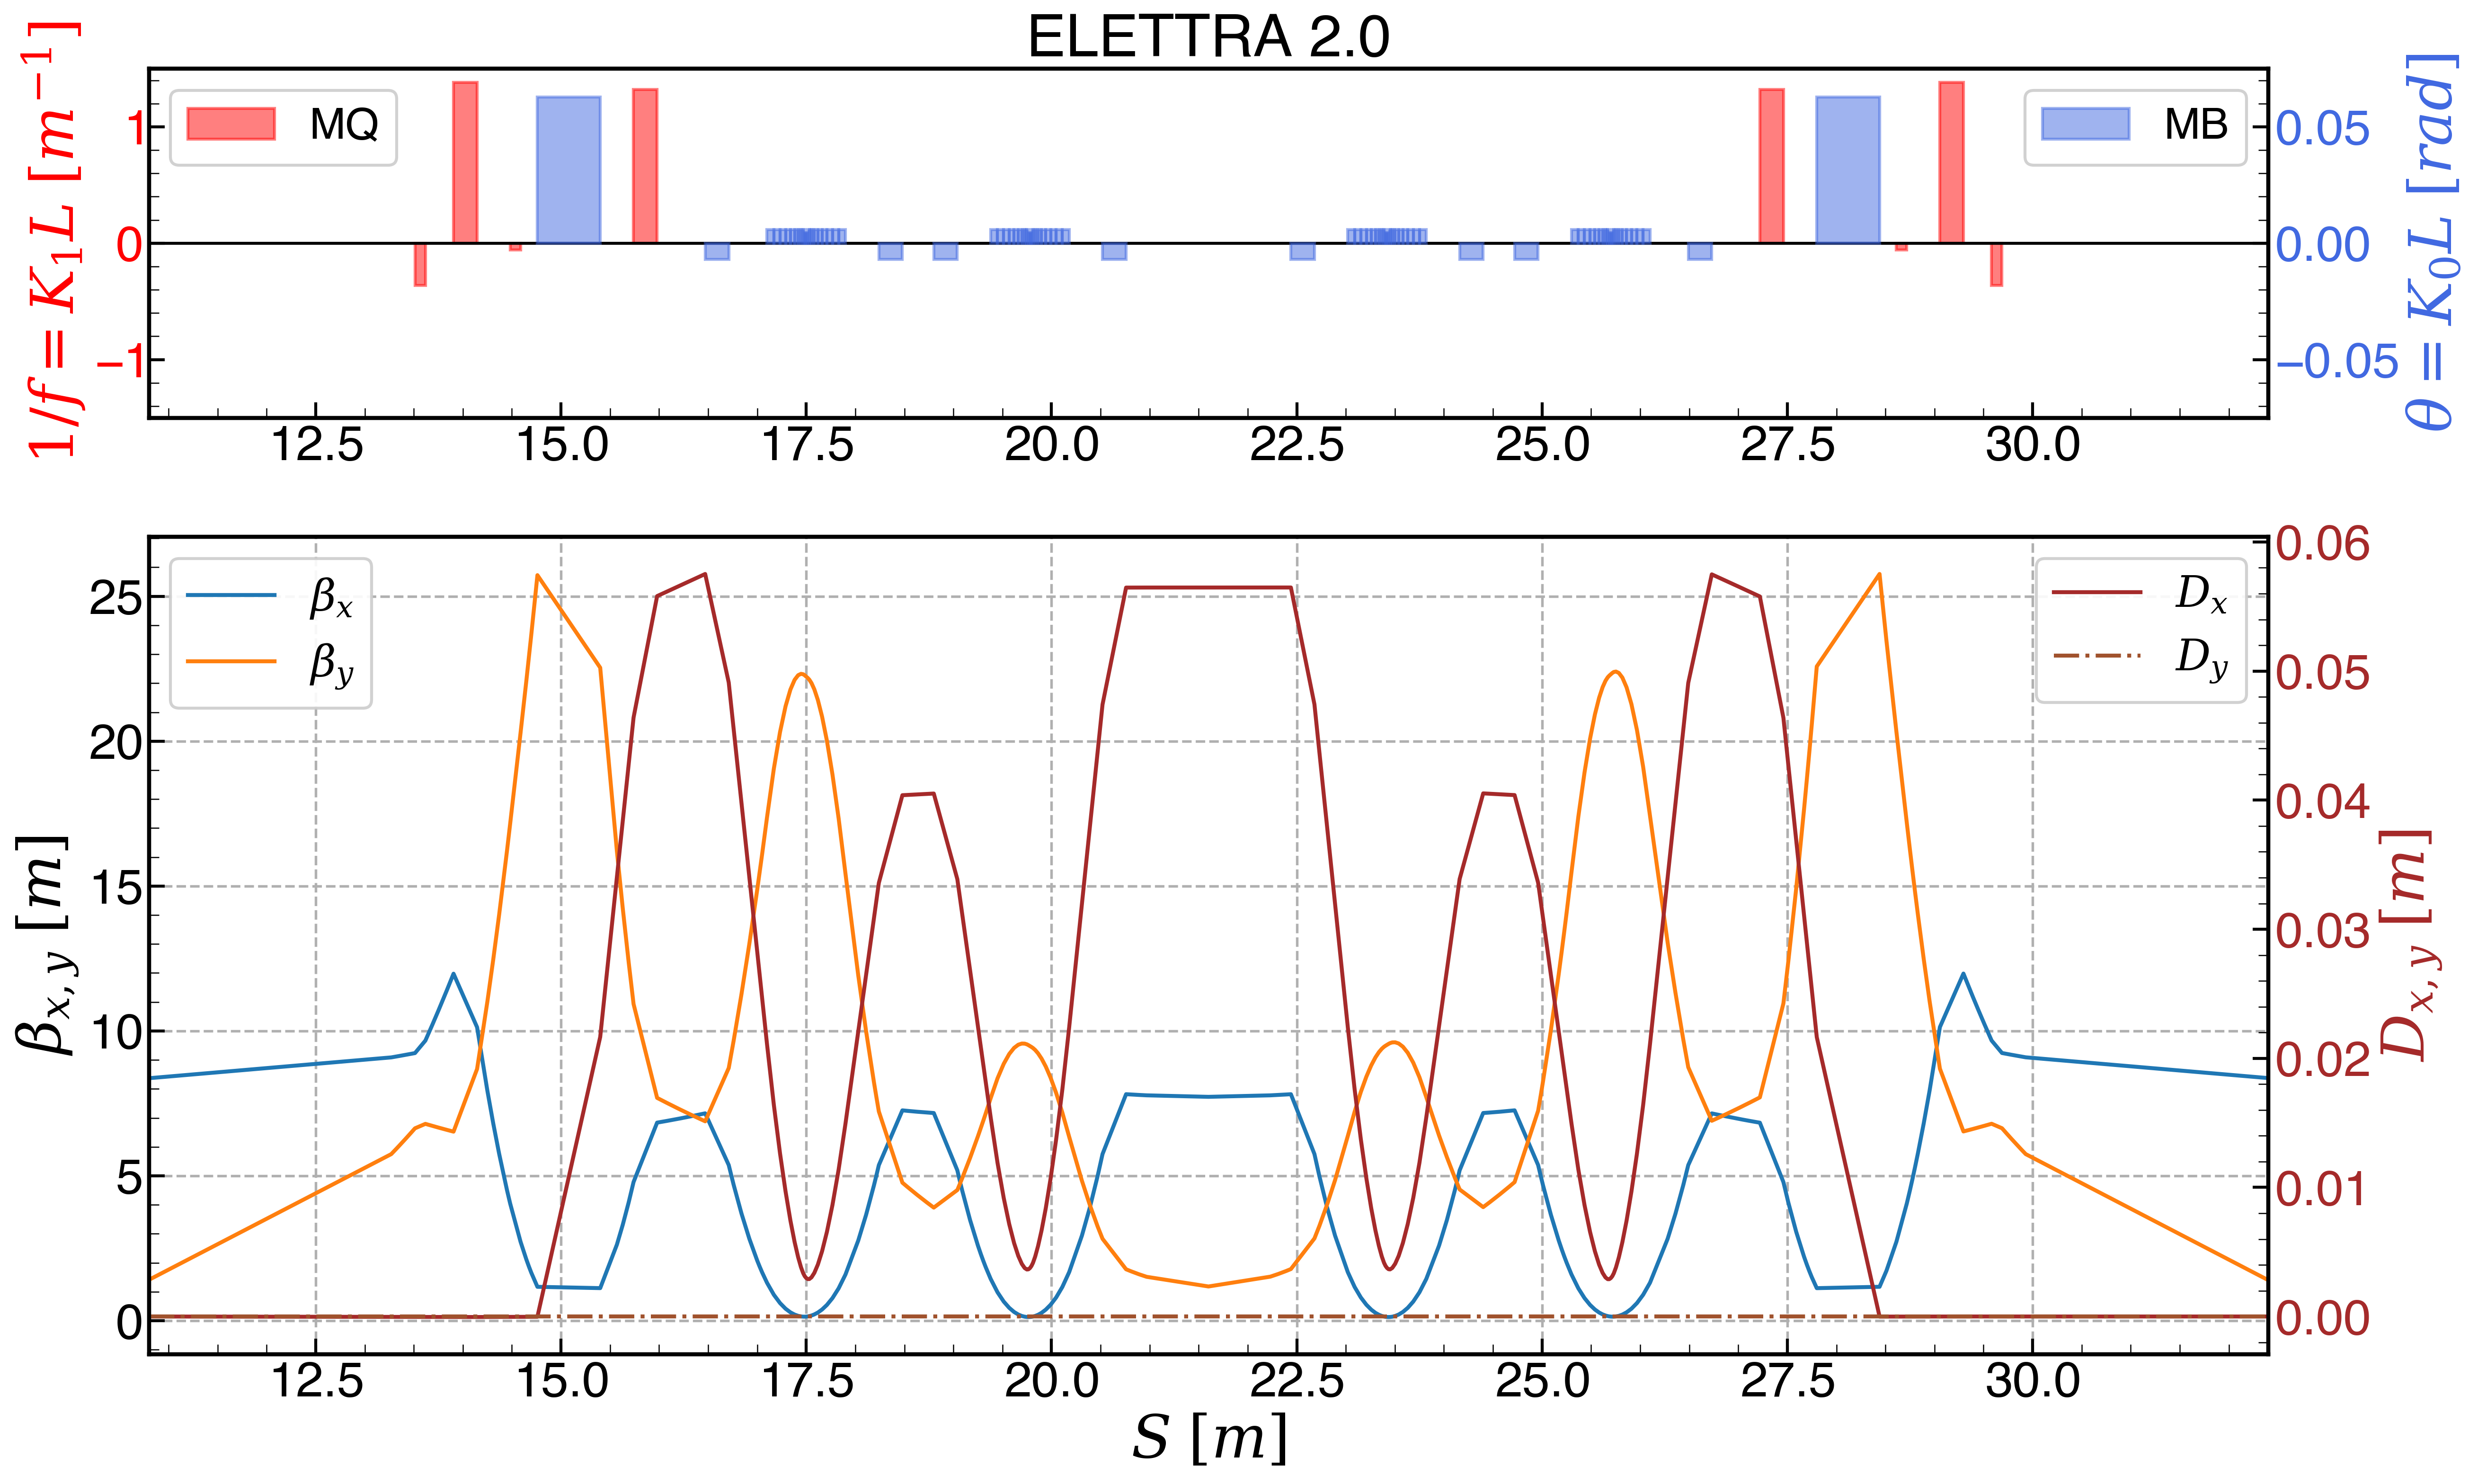

In [13]:
s_start = twiss[twiss.name=='ll:1']['s'][0]
s_end = twiss[twiss.name=='ll:3']['s'][0]

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(madx=madx, title='ELETTRA 2.0', 
                                                               xlimits=(s_start,s_end), disp_ylim=None, 
                                                               k0l_lim=(-75*1e-3,75*1e-3), k1l_lim=(-1.5,1.5))

In [15]:
# Compute Emittance 

madx.input(f'''
emit, deltap={madx.globals.deltap};
emit, deltap={madx.globals.deltap};
''')

# Stop MAD-X instance

#madx.quit()

# Get the emittance from the standard output

ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)


print(f'Emittance x : {ex*1e12} pm')

Emittance x : 155.66564 pm


In [33]:
madx.table.twiss.dx.max()*2

0.1151059314703096

2021-10-05 10:22:23.284 | INFO     | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:638 - Plotting optics functions and machine layout
2021-10-05 10:22:23.286 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:639 - Getting Twiss dataframe from cpymad
2021-10-05 10:22:24.092 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_make_elements_groups:1319 - Getting different element groups dframes from MAD-X twiss table
2021-10-05 10:22:24.236 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_plot_machine_layout:1191 - Plotting machine layout
2021-10-05 10:22:25.503 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:665 - Plotting beta functions
2021-10-05 10:22:25.529 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:673 - Plotting dispersion functions
2021-10-05 10:22:25.562 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:687 - Setting ylim for dispersion plot
2021-10-05 10:22:25.563 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:691 - Setting xlim 

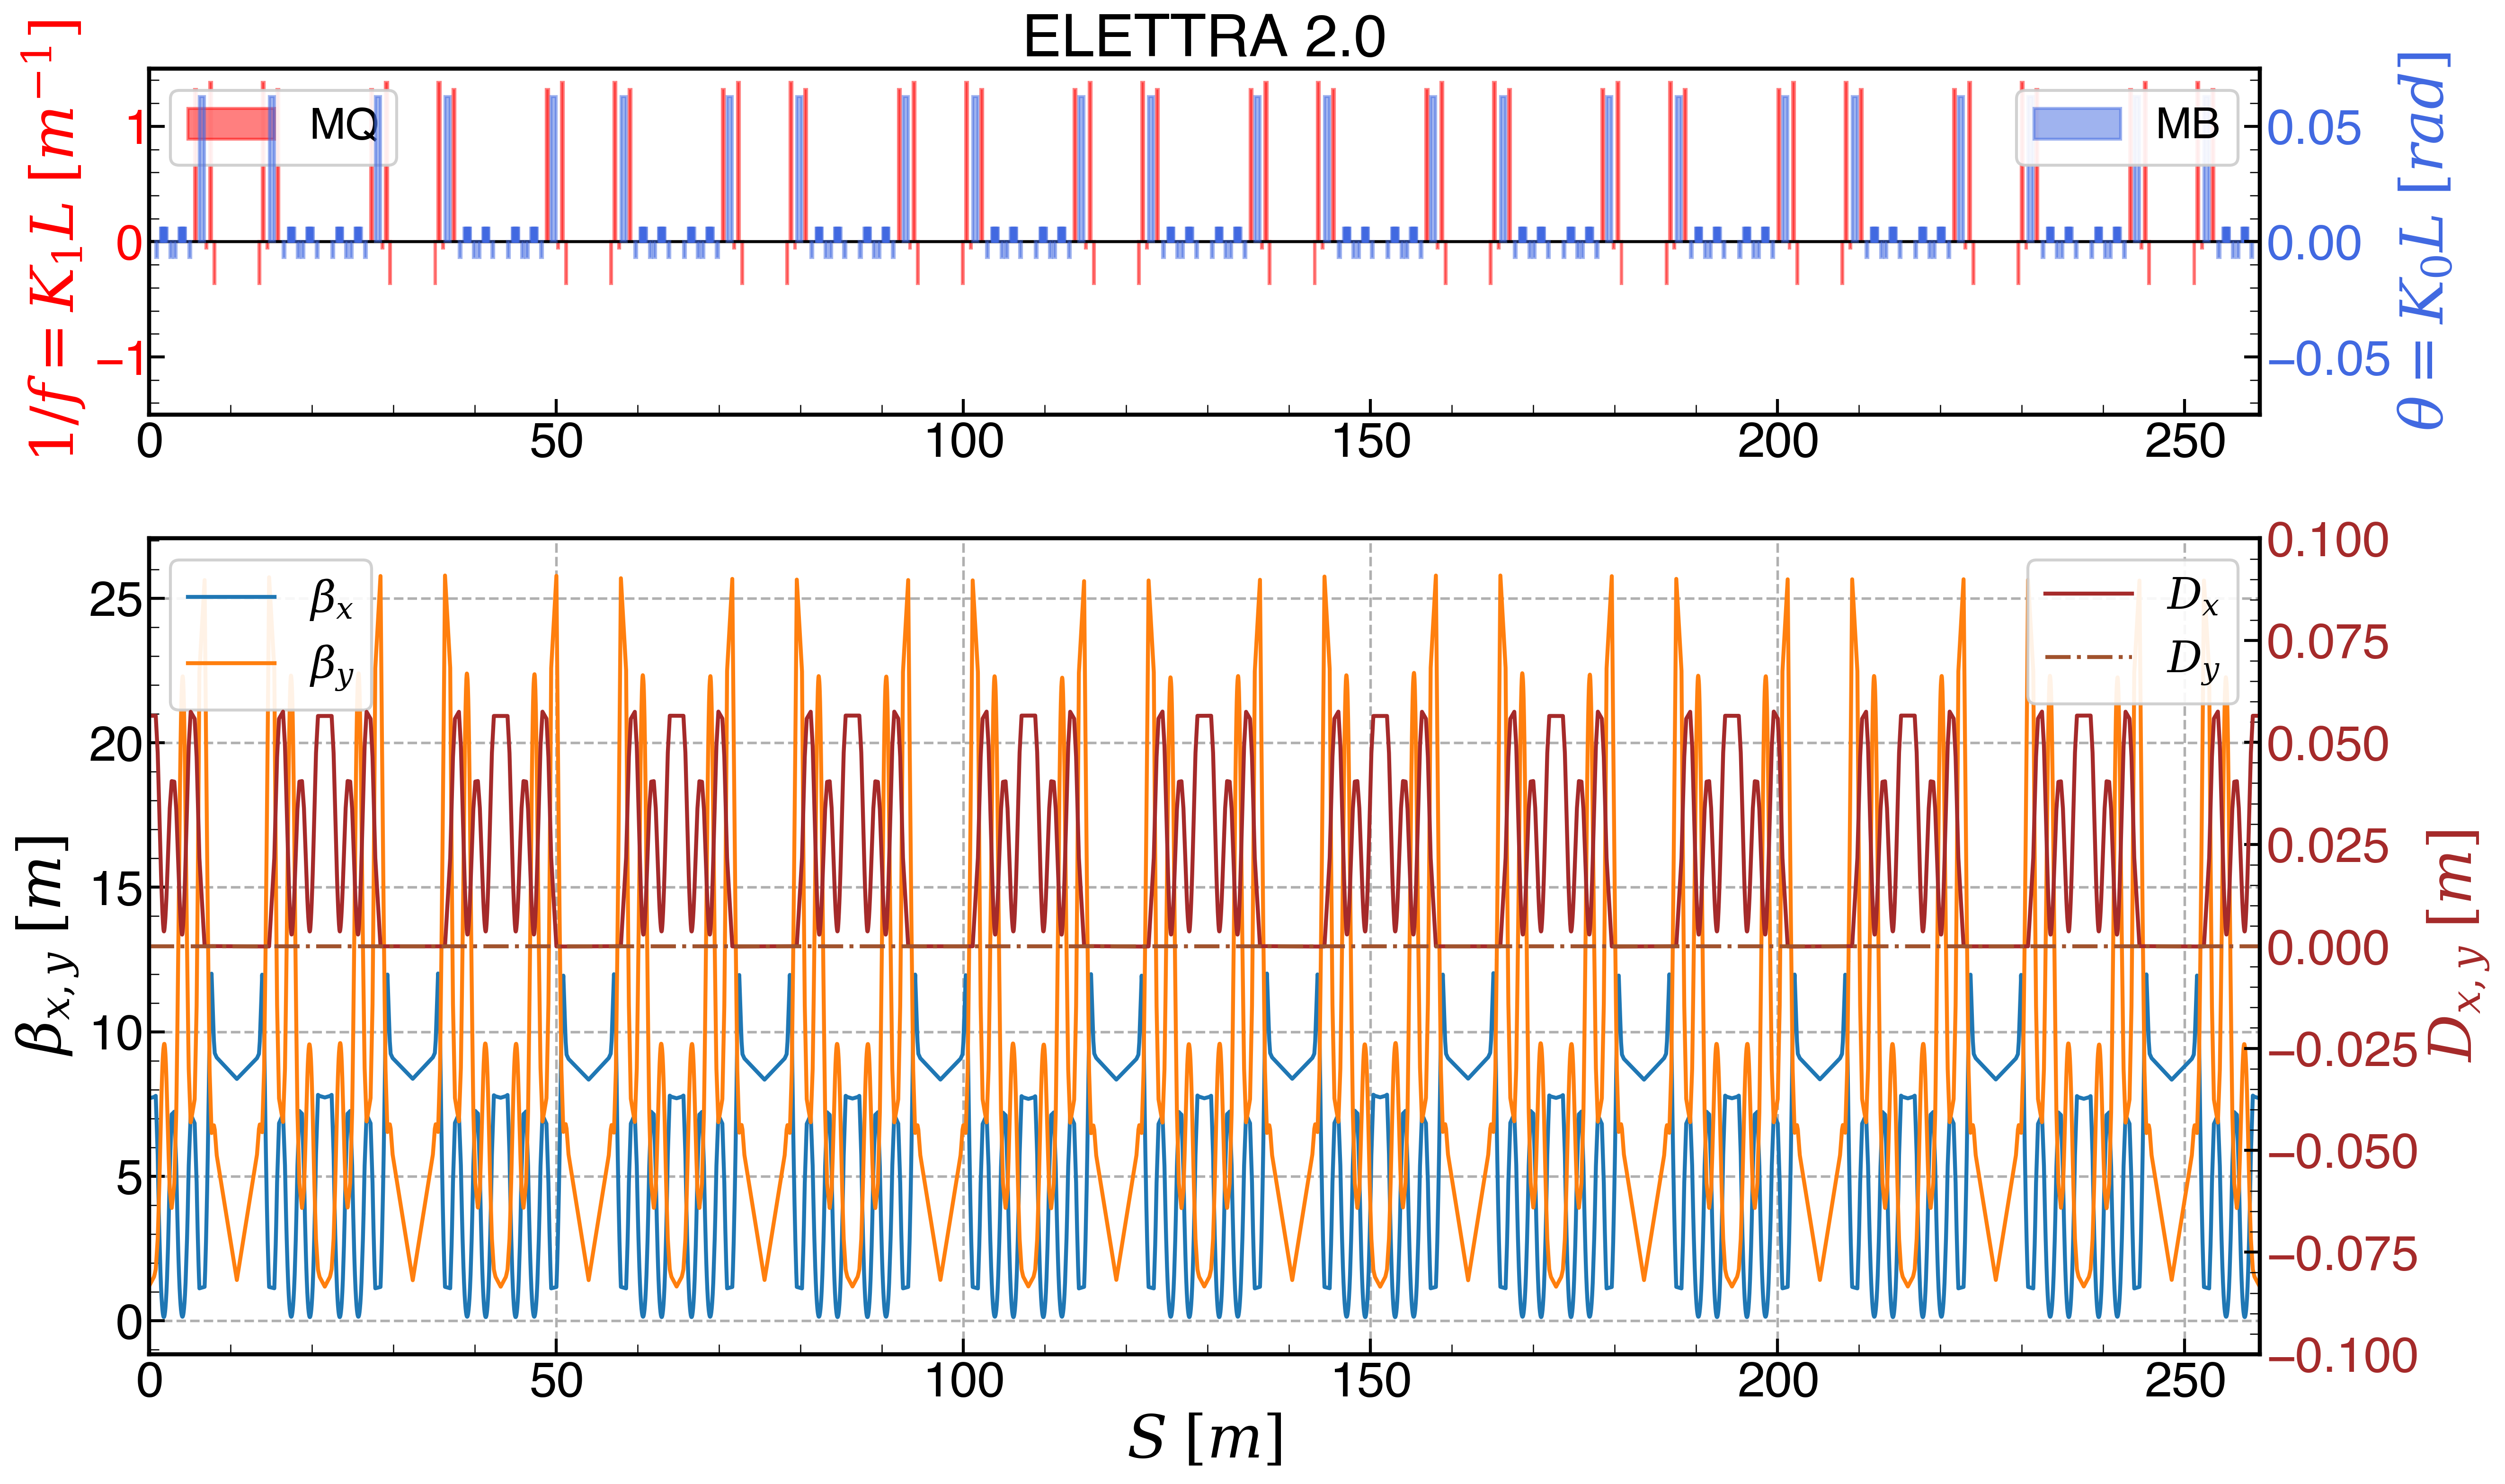

In [34]:
fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(madx=madx, title='ELETTRA 2.0', 
                                                               xlimits=None, disp_ylim=(-0.1,0.1), 
                                                               k0l_lim=(-75*1e-3,75*1e-3), k1l_lim=(-1.5,1.5))